In [1]:
from all_imports import *

import _modules

%store -r COZIE_MAIN_DF

df = COZIE_MAIN_DF.copy()
df['index_time'] = pd.to_datetime(df['index_time'])
df.set_index('index_time', inplace=True)

 ### test init### 


In [2]:
display(df.head(5))

,id_participant,id_onesignal,api_phone_survey_url,api_read_key,api_read_url,api_watch_survey_url,api_write_key,api_write_url,app_bundle_build_number,app_bundle_build_version,...,ws_sleep_unspecified,ws_sleep_unspecified_lambda,ws_sleep_unspecified_trigger,Skintemp_Value,ts_wrist_temperature,ts_wrist_temperature_lambda,ts_wrist_temperature_trigger,ws_wrist_temperature,ws_wrist_temperature_lambda,ws_wrist_temperature_trigger
index_time,,,,,,,,,,,,,,,,,,,,,
2024-01-18 00:00:00+08:00,esse00,940ec978-94ae-4e9d-a2b4-845e29892fab,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-18 07:21:45.906000+08:00,esse00,940ec978-94ae-4e9d-a2b4-845e29892fab,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-18 08:54:08.994000+08:00,esse00,940ec978-94ae-4e9d-a2b4-845e29892fab,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-18 08:55:47.902000+08:00,esse00,940ec978-94ae-4e9d-a2b4-845e29892fab,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-18 08:55:48.170000+08:00,esse00,940ec978-94ae-4e9d-a2b4-845e29892fab,https://forms.gle/BGGJ8es2fz4uvmFc7,5LkKVBO1Zp2pbYBbnkQsb8njmf8sGB5zhMrYQmPd,https://at6x6b7v54hmoki6dlyew72csq0ihxrn.lambd...,https://raw.githubusercontent.com/buds-lab/cal...,5LkKVBO1Zp2pbYBbnkQsb8njmf8sGB5zhMrYQmPd,https://43cb5nnwe3mejojyftbuaow4640nsrnd.lambd...,3.0.1,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Scoria_longitude    6725
Scoria_latitude     6725
c_latitude             0
c_longitude            0
dtype: int64


,Scoria_longitude,Scoria_latitude,Scoria_speed
index_time,,,
2023-11-22 23:47:58+08:00,103.770224,1.296894,2.352093
2023-11-22 23:48:00+08:00,103.770206,1.296935,1.471445
2023-11-22 23:48:01+08:00,103.770212,1.296987,0.482126
2023-11-22 23:48:02+08:00,103.770253,1.297016,0.507995
2023-11-22 23:48:03+08:00,103.770275,1.297014,0.507995


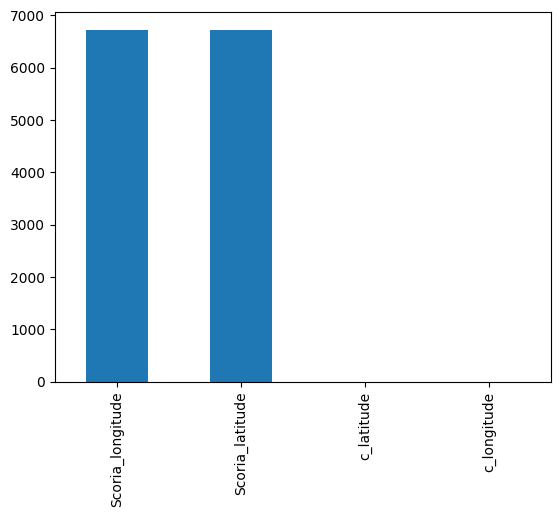

In [11]:
id_participant = 'esse00'
max_y = 20000  # Adjust this value as needed
start_date = pd.to_datetime('2024-02-20').tz_localize('UTC+08:00')
end_date = pd.to_datetime('2024-03-26').tz_localize('UTC+08:00')

# Count the occurrences of each location
filtered_df = df.loc[(df['participant_id'] == id_participant) &
                     (df['Scoria_speed'] <= 5) &
                     (start_date <= df.index) & (df.index <= end_date)].dropna(subset=['Scoria_longitude', 'Scoria_latitude', 'Scoria_speed'])


location_counts = filtered_df[['Scoria_longitude', 'Scoria_latitude', 'c_latitude', 'c_longitude']].count()
print(location_counts)

location_counts.plot(kind='bar')


# Filter for the participant 'esse02' and drop points with Scoria_movespeed higher than 5
filtered_df = df[(df['participant_id'] == id_participant) & (df['Scoria_speed'] <= 5)].dropna(subset=['Scoria_longitude', 'Scoria_latitude', 'Scoria_speed'])
display(filtered_df[['Scoria_longitude', 'Scoria_latitude', 'Scoria_speed']].head(5))



In [10]:
# Filter for the participant 'esse02' within the specified date range and with Scoria_speed less than or equal to 5
filtered_df = df.loc[(df['participant_id'] == id_participant) &
                     (df['Scoria_speed'] <= 5) &
                     (start_date <= df.index) & (df.index <= end_date)].dropna(subset=['Scoria_longitude', 'Scoria_latitude', 'Scoria_speed'])

display(filtered_df[['Scoria_longitude', 'Scoria_latitude', 'Scoria_speed']].head(5))

# Create a scatter plot with map background
fig = go.Figure(go.Scattermapbox(
    lat=filtered_df['Scoria_latitude'],
    lon=filtered_df['Scoria_longitude'],
    mode='markers',
    marker=go.scattermapbox.Marker(
        size=9,
        color=filtered_df['Scoria_speed'],  # Color points based on Scoria_speed
        colorscale='Viridis',  # Choose the colorscale
        colorbar=dict(title='Scoria Speed')  # Add colorbar
    )
))

fig.update_layout(
    mapbox=dict(
        style="carto-positron",  # Set the style to "carto-positron" for grey
        center=go.layout.mapbox.Center(
            lat=filtered_df['Scoria_latitude'].mean(),  # Center the map on mean latitude
            lon=filtered_df['Scoria_longitude'].mean(),  # Center the map on mean longitude
        ),
        zoom=10,  # Adjust the zoom level as needed
    ),
    legend=dict(
        title="Participant ID",
    ),
    width=800,  # Adjust the width of the plot
    height=800,  # Adjust the height of the plot
)

# Show the plot
fig.show()


,Scoria_longitude,Scoria_latitude,Scoria_speed
index_time,,,
2024-02-21 16:10:35+08:00,103.770596,1.297217,0.226693
2024-02-21 16:10:36+08:00,103.770602,1.297266,0.117197
2024-02-21 16:10:40+08:00,103.770633,1.297229,0.212651
2024-02-21 16:10:42+08:00,103.770675,1.297191,0.363908
2024-02-21 16:10:47+08:00,103.770649,1.297234,0.073607


In [4]:


# Filter for the participant 'esse02' and drop points with Scoria_movespeed higher than 5
filtered_df = df[(df['participant_id'] == id_participant) & (df['c_movespeed'] <= 5)].dropna(subset=['c_longitude', 'c_latitude', 'c_movespeed'])
display(filtered_df[['c_longitude', 'c_latitude', 'c_movespeed']].head(5))

# Create a scatter plot with map background
fig = go.Figure(go.Scattermapbox(
    lat=filtered_df['c_latitude'],
    lon=filtered_df['c_longitude'],
    mode='markers',
    marker=go.scattermapbox.Marker(
        size=9,
        color=filtered_df['c_movespeed'],  # Color points based on Scoria_movespeed
        colorscale='Viridis',  # Choose the colorscale
        colorbar=dict(title='c_movespeed')  # Add colorbar
    )
))

fig.update_layout(
    mapbox=dict(
        style="carto-positron",  # Set the style to "carto-positron" for grey
        center=go.layout.mapbox.Center(
            lat=filtered_df['c_latitude'].mean(),  # Center the map on mean latitude
            lon=filtered_df['c_longitude'].mean(),  # Center the map on mean longitude
        ),
        zoom=10,  # Adjust the zoom level as needed
    ),
    legend=dict(
        title="Participant ID",
    ),
    width=800,  # Adjust the width of the plot
    height=800,  # Adjust the height of the plot
)

# Show the plot
fig.show()


,c_longitude,c_latitude,c_movespeed
index_time,,,
2024-01-18 10:20:12.478000+08:00,103.770917,1.297357,0.000000
2024-01-18 13:00:56.555000+08:00,103.770883,1.297174,0.002178
2024-01-18 19:19:00.332000+08:00,103.773445,1.301267,0.023673
2024-01-19 09:47:05.676000+08:00,103.770938,1.297177,0.010233
2024-01-19 10:13:53.921000+08:00,103.770046,1.296455,0.079590
